In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
house_data = pd.read_csv('kc_house_data.csv')
train_data, test_data = train_test_split(house_data, test_size=0.8)


## Running Simple Linear Regression with SciKit

In [84]:
clf = LinearRegression(normalize=True)
train_x = np.array(train_data.sqft_living.values)
train_x = train_x.reshape(-1, 1)
train_y = np.array(train_data.price.values)
train_y = train_y.reshape(-1, 1)
clf.fit(train_x,train_y)
test_x = test_data.sqft_living.values
test_x = test_x.reshape(test_x.size, 1)
test_y = test_data.price.values
test_y = test_x.reshape(test_x.size, 1)
y_pred = clf.predict(np.array(test_x))
print(r2_score(test_data.price.values,y_pred))
print('coef: ',clf.coef_)
print('intercept: ',clf.intercept_)


0.4942540742066289
coef:  [[262.07421401]]
intercept:  [-9252.06903084]


## Simple Linear Regression for One Attribute

In [160]:
def linear_regression_gradient_descent(X,Y, a_1=0, a_0=0, epochs=100, alpha=0.000001):
    N = Y.size
    error = 0
    cost = 0
    for i in range(epochs):
        y_curr = a_1*X+a_0
        error = y_curr-Y
        cost = np.sum([val**2 for val in error])/N
        a_0 = a_0 - alpha * 2 * np.sum(error)/N
        a_1 = a_1 - alpha * 2 * np.sum(error * x_train)/N
    print('coef: ',a_1)
    print('intercept: ',a_0)
    print('error: ', error)
    print('cost:', cost**(0.5)/np.mean(Y))
    plt.scatter(X,Y)
    X=np.append(X,[0])
    
    plt.plot(X, a_1*X+a_0, '-g')
    plt.plot(X, 262.07421401*X-9252.06903084, '--r')

    return lambda input: a_1*input+a_0

coef:  253.98253987430812
intercept:  25.398253987430817
error:  [[  66346.90477414]
 [-178000.42175707]
 [ 299432.66595626]
 ...
 [ 345424.82787573]
 [  29447.00160458]
 [  93925.96339254]]
cost: 0.4672078002774965


<function __main__.linear_regression_gradient_descent.<locals>.<lambda>(input)>

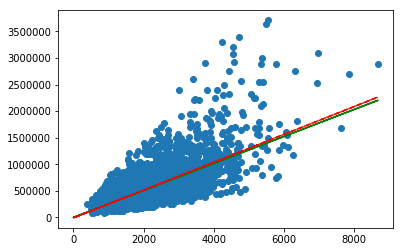

In [161]:
train_x = np.array(train_data.sqft_living.values)
train_x = train_x.reshape(-1, 1)

train_y = np.array(train_data.price.values)
train_y = train_y.reshape(-1, 1)

linear_regression_gradient_descent(train_x, train_y)

## Multiple Attribute Linear Regression

In [9]:
features_data = house_data.copy()
features_data.drop(['date', 'price', 'id'],axis=1, inplace=True)
Y = house_data['price'].values
X = features_data.values


#Concatenate a0 column filled with 1s
X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)

#Training scikit
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)





### Printing Scikit's Solution

In [224]:
clf = LinearRegression(normalize=False)
clf.fit(x_train,y_train)
print(clf.coef_)
print(clf.intercept_)


[ 0.00000000e+00 -3.51302696e+04  4.26814249e+04  1.12822218e+02
  8.46929023e-02  6.14364871e+03  5.83829546e+05  5.32355350e+04
  2.67234204e+04  9.51715136e+04  7.19740410e+01  4.08481766e+01
 -2.64522162e+03  1.77042983e+01 -5.99957031e+02  6.04678967e+05
 -2.17539349e+05  1.94257677e+01 -3.35027975e-01]
8021437.818829906


### Hand-crafted Implementation

In [265]:
def linear_regression(x_train,y_train, alpha=pow(10,-10), epochs=100):
#     alpha = 0.001
    cost = []
    theta = np.zeros((x_train.shape[1],1))
    m = x_train.size
    for i in range(epochs):
        h_target = np.dot(x_train,theta)

        error = h_target-y_train
        cost.append((1/m)*np.sum(np.square(error)))
        theta = theta - alpha/m * x_train.T.dot(error)


#     print(theta.shape)
#     print(target.shape)
#     print(x_train[:,1].shape)
#     print(target.shape)
#     lst = [i for i in range(cost.size)]
    plt.plot([i for i in range(epochs)],cost)
    print('coef: ',theta[1:])
    print('intercept = ', theta[0])
    
        


coef:  [[ 8.49596903e-05  2.11413693e-04  1.47829861e-04 ...  1.15171356e-04
   3.38139567e-04  9.00572717e-05]
 [ 5.29905994e-05  1.31861808e-04  9.22036430e-05 ...  7.18340566e-05
   2.10902586e-04  5.61700354e-05]
 [ 5.14038473e-02  1.27913334e-01  8.94426943e-02 ...  6.96830554e-02
   2.04587312e-01  5.44880782e-02]
 ...
 [-3.08880614e-03 -7.68618521e-03 -5.37452269e-03 ... -4.18718561e-03
  -1.22934485e-02 -3.27413451e-03]
 [ 4.94637288e-02  1.23085543e-01  8.60668880e-02 ...  6.70530307e-02
   1.96865640e-01  5.24315525e-02]
 [ 1.78694470e-01  4.44663319e-01  3.10928378e-01 ...  2.42238224e-01
   7.11203991e-01  1.89416138e-01]]
intercept =  [2.52718376e-05 6.28864406e-05 4.39729974e-05 ... 3.42585030e-05
 1.00581913e-04 2.67881478e-05]


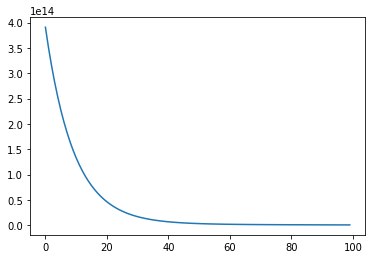

In [266]:
linear_regression(x_train, y_train)